In [1]:
import pickle
import matplotlib.pyplot as plt

with open("natural_matrix/RT25M002_matrix.dat", 'rb') as f:
    T25 = pickle.load(f)

with open("natural_matrix/RT30M004_matrix.dat", 'rb') as f:
    T30 = pickle.load(f)
    
with open("natural_matrix/RT35M006_matrix.dat", 'rb') as f:
    T35 = pickle.load(f)

with open("natural_matrix/RT40M008_matrix.dat", 'rb') as f:
    T40 = pickle.load(f)
    
with open("natural_matrix/RT45M010_matrix.dat", 'rb') as f:
    T45 = pickle.load(f)
 
with open("natural_matrix/RT55M012_matrix.dat", 'rb') as f:
    T55 = pickle.load(f)
    
with open("natural_matrix/RT65M014_matrix.dat", 'rb') as f:
    T65 = pickle.load(f)

with open("natural_matrix/RT75M016_matrix.dat", 'rb') as f:
    T75 = pickle.load(f)

##############################################    
    
# with open("T25forT25_matrix.dat", 'rb') as f:
#     T25F25 = pickle.load(f)

# with open("T25forT35_matrix.dat", 'rb') as f:
#     T25F35 = pickle.load(f)

# with open("T25forT45_matrix.dat", 'rb') as f:
#     T25F45 = pickle.load(f)
    
# with open("T25forT65_matrix.dat", 'rb') as f:
#     T25F65 = pickle.load(f)
    
# with open("T25forT75_matrix.dat", 'rb') as f:
#     T25F75 = pickle.load(f)

In [53]:
# with open("T25_matrix.dat", 'rb') as f:
#     T25 = pickle.load(f)

# with open("T35_matrix.dat", 'rb') as f:
#     T35 = pickle.load(f)

# with open("T45_matrix.dat", 'rb') as f:
#     T45 = pickle.load(f)

# with open("T65_matrix.dat", 'rb') as f:
#     T65 = pickle.load(f)
    
# with open("T75_matrix.dat", 'rb') as f:
#     T75 = pickle.load(f)


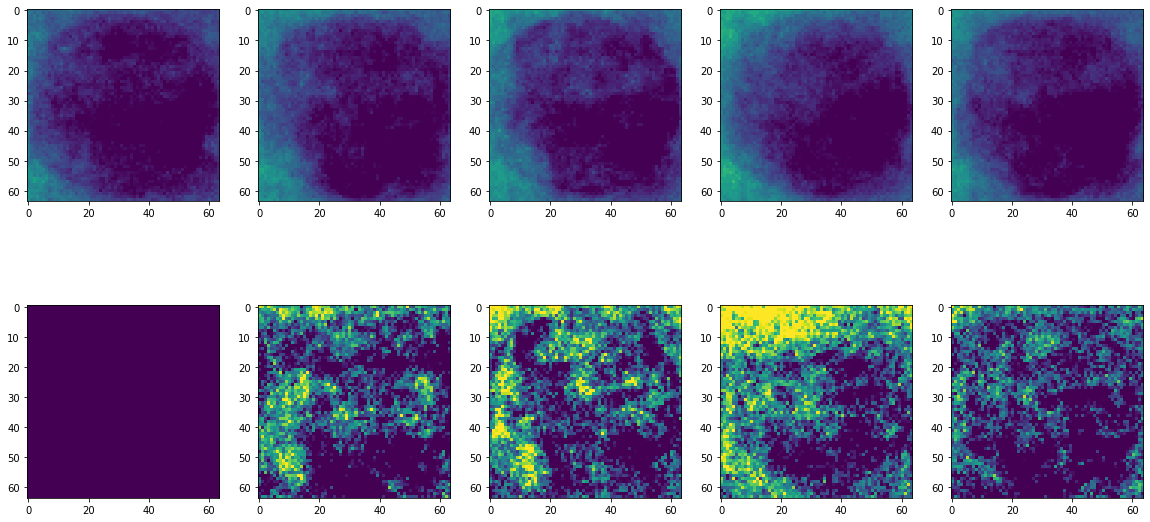

In [24]:
plt.figure(figsize = (20, 10))
plt.subplot(251)
plt.imshow(torch.mean(T25 , axis = 1).reshape(64,64))
plt.clim(0,0.001)
plt.subplot(252)
plt.imshow(torch.mean(T35 , axis = 1).reshape(64,64))
plt.clim(0,0.001)
plt.subplot(253)
plt.imshow(torch.mean(T45 , axis = 1).reshape(64,64))
plt.clim(0,0.001)
plt.subplot(254)
plt.imshow(torch.mean(T55 , axis = 1).reshape(64,64))
plt.clim(0,0.001)
plt.subplot(255)
plt.imshow(torch.mean(T65 , axis = 1).reshape(64,64))
plt.clim(0,0.001)

plt.subplot(256)
plt.imshow(torch.mean(T25-T25 , axis = 1).reshape(64,64))
plt.clim(0,0.0002)
plt.subplot(257)
plt.imshow(torch.mean(T35-T25 , axis = 1).reshape(64,64))
plt.clim(0,0.0002)
plt.subplot(258)
plt.imshow(torch.mean(T45-T25 , axis = 1).reshape(64,64))
plt.clim(0,0.0002)
plt.subplot(259)
plt.imshow(torch.mean(T55-T25 , axis = 1).reshape(64,64))
plt.clim(0,0.0002)
plt.subplot(2,5,10)
plt.imshow(torch.mean(T65-T25 , axis = 1).reshape(64,64))
plt.clim(0,0.0002)
# plt.colorbar()
plt.show()

In [5]:
import numpy as np
import torch

def mse(a,b):
    return torch.mean(torch.square(torch.subtract(a,b)), axis = 0)

In [28]:
mses = []
for i in range(64*64):

    mse1 = mse(T30[i,:], T35[i,:]) ### For a single pixel on SLM, the MSE changes on the camera with different temperature
    mse2 = mse(T30[i,:], T40[i,:])
    mse3 = mse(T30[i,:], T45[i,:])
    mse4 = mse(T30[i,:], T55[i,:])
    mse5 = mse(T30[i,:], T65[i,:])
    
    
#     mse1 = mse(T25F25[i,:], T25[i,:]) ### For a single pixel on SLM, the MSE changes on the camera with different temperature
#     mse2 = mse(T25F35[i,:], T35[i,:])
#     mse3 = mse(T25F45[i,:], T45[i,:])
#     mse4 = mse(T25F65[i,:], T65[i,:])
#     mse5 = mse(T25F75[i,:], T75[i,:])
    mses.append(np.array([mse1,mse2,mse3,mse4,mse5]))
    
ms = np.array(mses)
np.shape(ms)

(4096, 5)

In [ ]:
28*28 x 112*112

28*28 x 1 


1 x 112*112 T25
1 x 112*122 T35

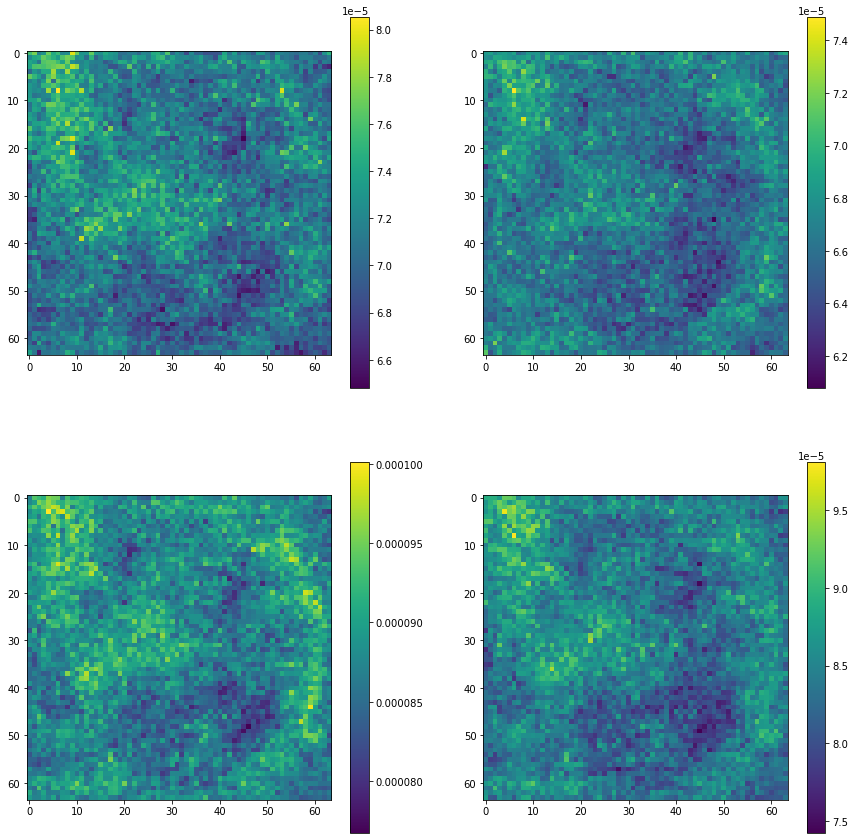

In [29]:
gs = 64

plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.imshow(ms[:,1].reshape(gs,gs))
plt.colorbar()

plt.subplot(222)
plt.imshow(ms[:,2].reshape(gs,gs))
plt.colorbar()

plt.subplot(223)
plt.imshow(ms[:,3].reshape(gs,gs))
plt.colorbar()

plt.subplot(224)
plt.imshow(ms[:,4].reshape(gs,gs))
plt.colorbar()
plt.show()

In [85]:
T25[1]

tensor([ 0.0085,  0.0108,  0.0002,  ..., -0.0011,  0.0018,  0.0066])

In [87]:
T65[1]

tensor([ 0.0063, -0.0069, -0.0139,  ...,  0.0026,  0.0049,  0.0233])

In [17]:
mses = []
for i in range(112*112):
    mse1 = mse(T25[:,i], T25[:,i])### For a single pixel on Camera, the MSE changes on the SLM with different temperature
    mse2 = mse(T25[:,i], T35[:,i])
    mse3 = mse(T25[:,i], T45[:,i])
    mse4 = mse(T25[:,i], T65[:,i])
    mse5 = mse(T25[:,i], T75[:,i])
    mses.append(np.array([mse1,mse2,mse3,mse4,mse5]))
    
# plt.figure(figsize = (10,10))
# plt.imshow(T65[:,0].reshape(28,28))
# plt.colorbar()
# plt.show()

ms = np.array(mses)
np.shape(ms)

(12544, 5)

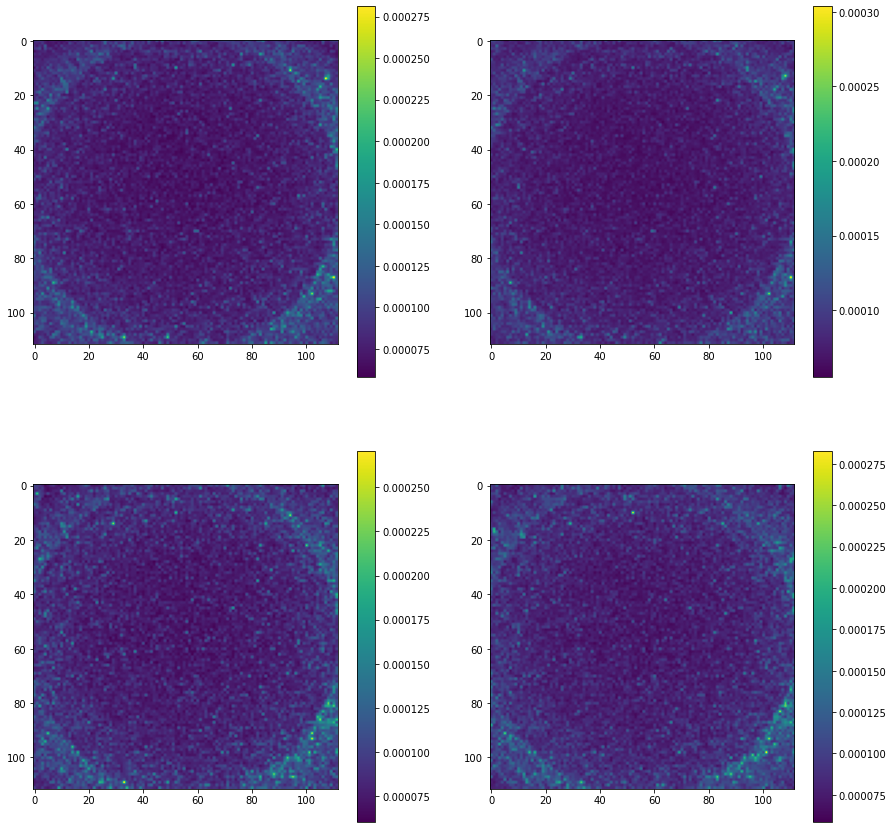

In [18]:
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.imshow(ms[:,1].reshape(112,112))
plt.colorbar()

plt.subplot(222)
plt.imshow(ms[:,2].reshape(112,112))
plt.colorbar()

plt.subplot(223)
plt.imshow(ms[:,3].reshape(112,112))
plt.colorbar()

plt.subplot(224)
plt.imshow(ms[:,4].reshape(112,112))
plt.colorbar()
plt.show()

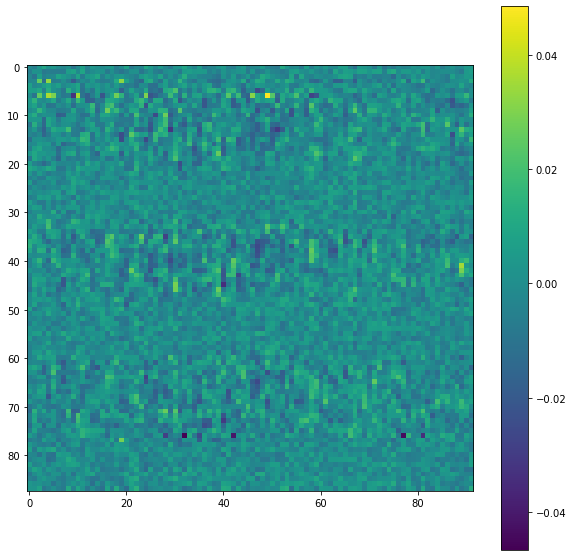

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(T65[338:426,6126:6218])
plt.colorbar()
plt.show()

In [68]:
with open("FT25_matrix.dat", 'rb') as f:
    FT25 = pickle.load(f)

with open("FT35_matrix.dat", 'rb') as f:
    FT35 = pickle.load(f)
    
with open("FT45_matrix.dat", 'rb') as f:
    FT45 = pickle.load(f)
    
with open("FT65_matrix.dat", 'rb') as f:
    FT65 = pickle.load(f)

with open("FT75_matrix.dat", 'rb') as f:
    FT75 = pickle.load(f)
    
mses = []
for i in range(784):
    
    mse1 = mse(FT25[:,i], FT25[:,i])
    mse2 = mse(FT25[:,i], FT35[:,i])
    mse3 = mse(FT25[:,i], FT45[:,i])
    mse4 = mse(FT25[:,i], FT65[:,i])
    mse5 = mse(FT25[:,i], FT75[:,i])
    
    mses.append(np.array([mse1,mse2,mse3,mse4,mse5]))
    
ms = np.array(mses)
np.shape(ms)

(784, 5)

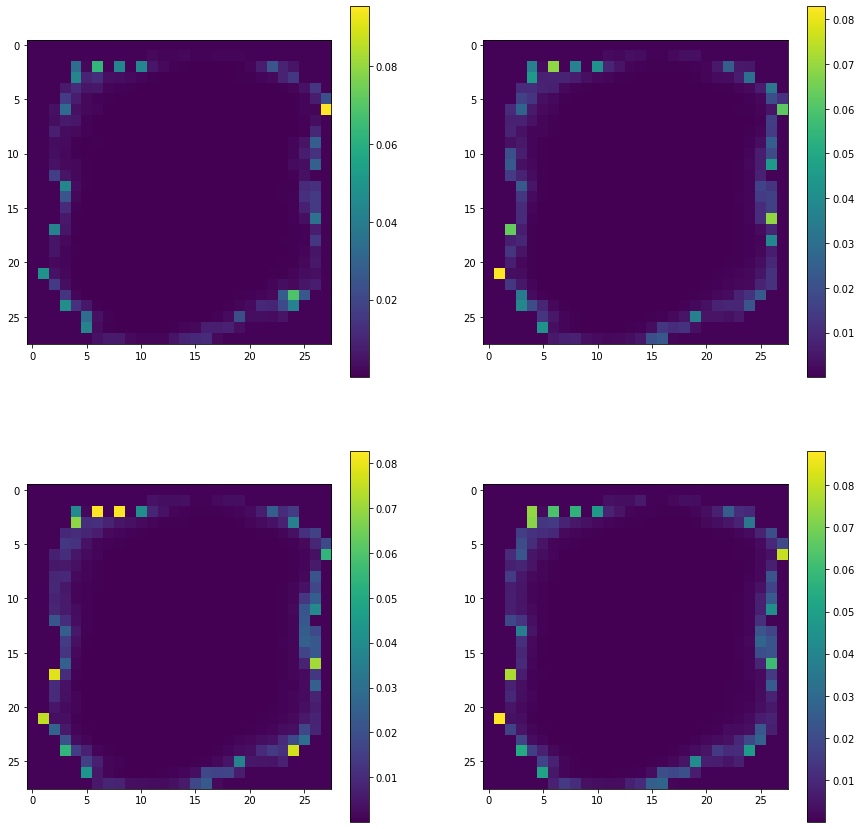

In [69]:
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.imshow(ms[:,1].reshape(28,28))
plt.colorbar()

plt.subplot(222)
plt.imshow(ms[:,2].reshape(28,28))
plt.colorbar()

plt.subplot(223)
plt.imshow(ms[:,3].reshape(28,28))
plt.colorbar()

plt.subplot(224)
plt.imshow(ms[:,4].reshape(28,28))
plt.colorbar()
plt.show()

In [66]:
FT25.shape

torch.Size([12544, 784])

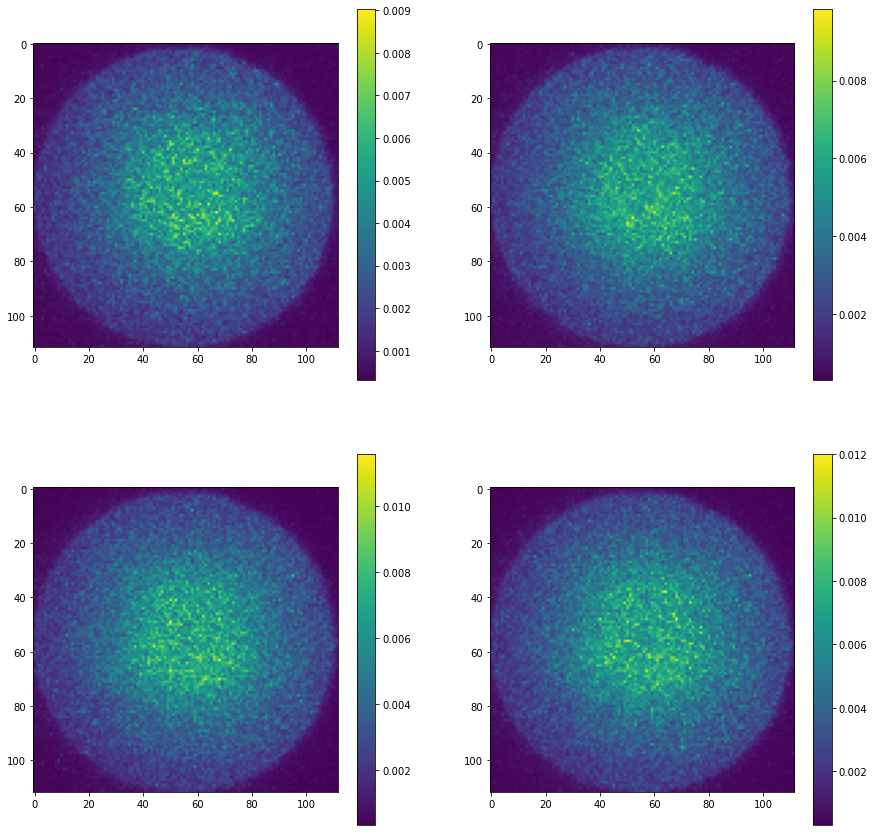

In [67]:
mses = []
for i in range(112*112):
    mse1 = mse(FT25[i,:], FT25[i,:])
    mse2 = mse(FT25[i,:], FT35[i,:])
    mse3 = mse(FT25[i,:], FT45[i,:])
    mse4 = mse(FT25[i,:], FT65[i,:])
    mse5 = mse(FT25[i,:], FT75[i,:])
    mses.append(np.array([mse1,mse2,mse3,mse4,mse5]))

ms = np.array(mses)
np.shape(ms)

plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.imshow(ms[:,1].reshape(112,112))
plt.colorbar()

plt.subplot(222)
plt.imshow(ms[:,2].reshape(112,112))
plt.colorbar()

plt.subplot(223)
plt.imshow(ms[:,3].reshape(112,112))
plt.colorbar()

plt.subplot(224)
plt.imshow(ms[:,4].reshape(112,112))
plt.colorbar()
plt.show()